converged: True
[[0.00975542 0.99024458]
 [0.01639435 0.98360565]
 [0.0168682  0.9831318 ]
 ...
 [0.00685665 0.99314335]
 [0.02064777 0.97935223]
 [0.00882786 0.99117214]]
[1 1 1 ... 1 1 1]
[0.26043162 0.73956838]
5.442282998909714
Value of cluster = 0 implies color black 
Value of cluster = 1 implies color blue 


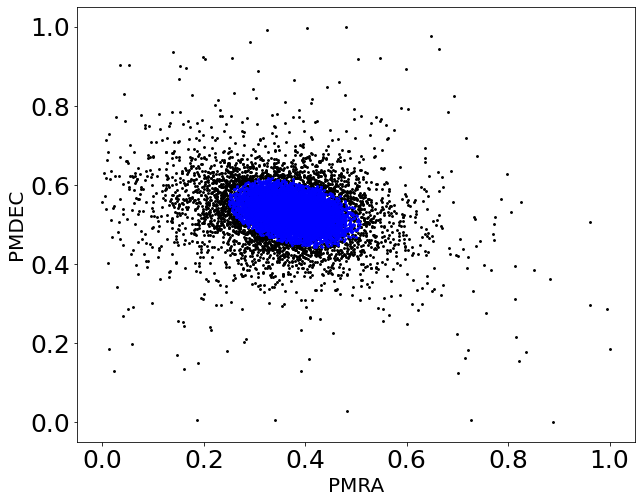

In [69]:
import numpy as np
import pandas as pd
from astropy.io import ascii 
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.stats import norm

#Importing the data
dataset = pd.read_csv (r"C:\Users\Test\Desktop\10 arc min with parallax non negative.CSV", header = 0, usecols=[1,2,3,4,5])
#print(dataset.describe())

#Scalling the data and fitting the training data
scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
dataset2 = pd.DataFrame(d, columns=names)
dataset2.head()
#print(dataset2.describe())


#GMM
gmm = GaussianMixture(n_components=2, init_params='random', max_iter=800, tol=1e-6)
gmm.fit(dataset2)
means = gmm.means_
covariances = gmm.covariances_

#Checking convergence
print('converged:',gmm.converged_)

proba = gmm.predict_proba(dataset2)
print(proba)
print(gmm.predict(dataset2))
print(gmm.weights_)
print(gmm.score(dataset2))

#converting proba into .csv type file
ascii.write(proba, 'proba.csv', format='tab', overwrite=True)

#creating labels for clusters
labels = gmm.predict(dataset2)
ascii.write(labels, 'predict.csv', format='tab', overwrite=True)
frame = pd.DataFrame(dataset2)
frame['cluster']=labels
frame.columns = [0,1,2,3,4,'cluster']
frame.to_csv('frame.csv', mode='w', sep='\t', index=False, header=False)

#Plotting the graph
color=['black','blue']
for k in range(0,2):
    dataset2 = frame[frame["cluster"]==k]
    plt.rcParams.update({'font.size': 25})
    plt.scatter(dataset2[3],dataset2[4],c=color[k], s=3.5)
    plt.gcf().set_size_inches((10,8))
    plt.xlabel("PMRA")
    plt.ylabel("PMDEC")
    print("Value of cluster = {} implies color {} ".format(k, color[k]))
plt.savefig("GMM_clustering_5")
plt.show()

In [ ]:
final2 = dataset
final2['cluster'] = labels
final2['prob1'] = proba[:,0]
final2['prob2'] = proba[:,1]

final2.to_csv('final.csv', mode = 'w', sep=',', index=False)

In [66]:
#Filtering the blue cluster
id__ = []
cluster2 = np.array(frame['cluster'])
for i in range(len(cluster2)):
    if cluster2[i] == 1:
        id__.append(i)

len(id__)  

14855

In [10]:
dataset3 = dataset.iloc[id__,:]
dataset3

,ra,dec,parallax,pmra,pmdec
0,168.351501,-60.946189,0.397397,-6.875508,2.384085
1,168.347874,-60.939097,0.247782,-5.114386,0.737710
2,168.372657,-60.942120,0.369242,-4.297068,1.434335
3,168.346511,-60.940230,0.289059,-6.739856,1.363203
4,168.348922,-60.932702,0.301930,-6.676223,3.020587
...,...,...,...,...,...
19560,168.171105,-60.626272,0.027890,-6.447299,1.568615
19562,168.144548,-60.633121,0.318541,-6.878257,2.547846
19563,168.142708,-60.634541,0.193870,-6.949487,1.823970
19564,168.143920,-60.633360,0.301561,-6.594519,3.610575


In [61]:
#aryanb is the data where the sources are filtered (removed) with probability < 0.9 in cluster 1 (the centre cluster)
aryanb = pd.read_csv (r"C:\Users\Test\Astro\Aryanb.csv", header = 0, usecols=[0,1,2,3,4,5])

In [62]:
len(aryanb)

12867

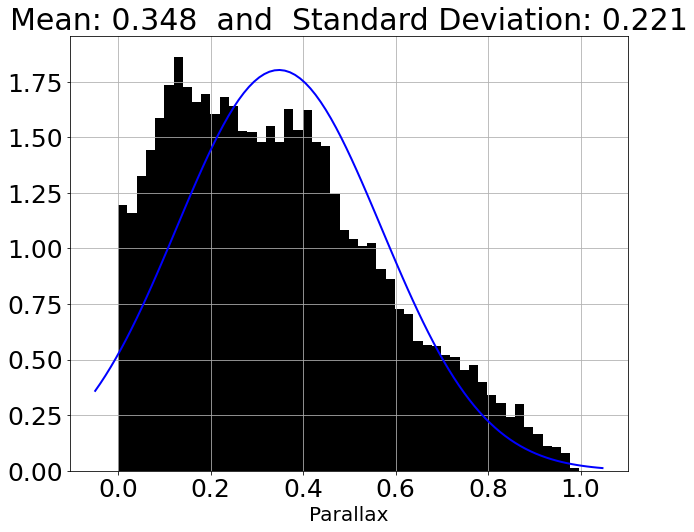

In [56]:
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from astropy.io import ascii
from scipy.stats import norm

aryanb = pd.read_csv (r"C:\Users\Test\Astro\Aryanb.csv", header = 0, usecols=[2])
aryanb.hist(bins=50, density = True, color = "black")

mu, std = norm.fit(aryanb)
plt.gcf().set_size_inches((10, 8)) 
#plt.savefig("Parallax Distribution")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, color = "blue")
title = "Mean: {:.3f}  and  Standard Deviation: {:.3f}".format(mu, std)
plt.title(title)
plt.ylabel('')
plt.xlabel('Parallax')
plt.savefig("Gaussian Fit to Histogram of Parallax")
plt.show()

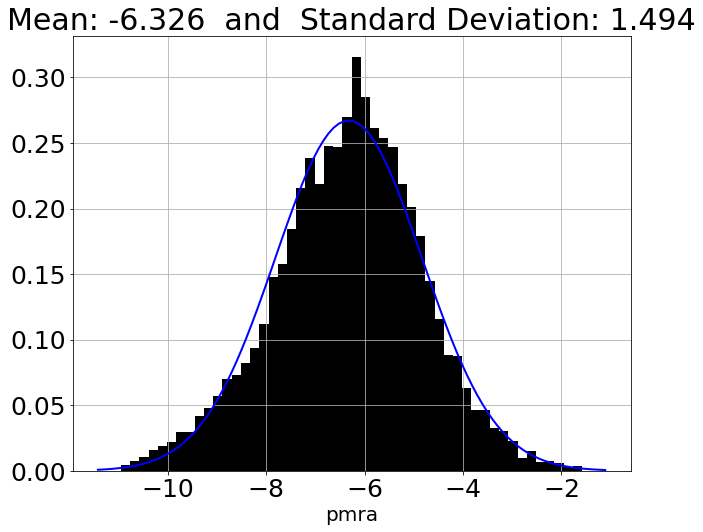

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from astropy.io import ascii
from scipy.stats import norm

aryanb = pd.read_csv (r"C:\Users\Test\Astro\Aryanb.csv", header = 0, usecols=[3])
aryanb.hist(bins=50, density = True, color = "black")

mu, std = norm.fit(aryanb)
plt.gcf().set_size_inches((10, 8)) 
#plt.savefig("Parallax Distribution")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, color = "blue")
title = "Mean: {:.3f}  and  Standard Deviation: {:.3f}".format(mu, std)
plt.title(title)
plt.xlabel('pmra')
plt.savefig("Gaussian Fit to Histogram of pmra")
plt.show()

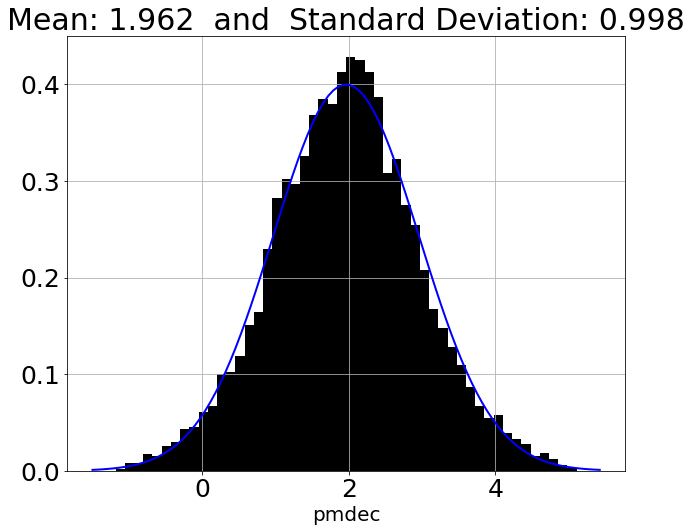

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from astropy.io import ascii
from scipy.stats import norm

aryanb = pd.read_csv (r"C:\Users\Test\Astro\Aryanb.csv", header = 0, usecols=[4])
aryanb.hist(bins=50, density = True, color = "black")

mu, std = norm.fit(aryanb)
plt.gcf().set_size_inches((10, 8)) 
#plt.savefig("Parallax Distribution")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, color = "blue")
title = "Mean: {:.3f}  and  Standard Deviation: {:.3f}".format(mu, std)
plt.title(title)
plt.xlabel('pmdec')
plt.savefig("Gaussian Fit to Histogram of pmdec")
plt.show()

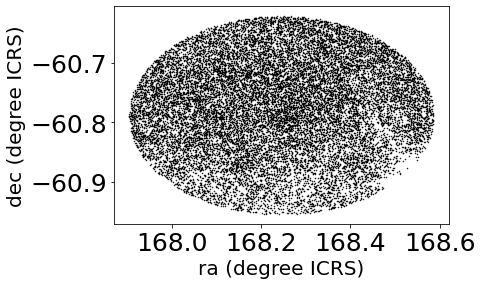

In [41]:
import matplotlib.pyplot as plt

x = dataset['ra']
y = dataset['dec']
plt.plot(x, y, 'ok', markersize = 0.5, alpha = 1)
plt.rc('axes', labelsize = 20)
plt.xlabel('ra (degree ICRS)', size = 20)
plt.ylabel('dec (degree ICRS)', size = 20)
plt.savefig("ra vs dec", bbox_inches="tight")